In [37]:
%matplotlib inline
import matplotlib as lib
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json
from altair import *
from ggplot import *
import numpy as np

In [38]:
data=pd.read_csv("Tweets.csv")
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513  neutral           1.0000                         
1  570301130888122368  positive          0.3486                         
2  570301083672813571  neutral           0.6837                         
3  570301031407624196  negative          1.0000                         
4  570300817074462722  negative          1.0000                         

  negativereason  negativereason_confidence         airline  \
0  NaN           NaN                         Virgin America   
1  NaN            0.0000                     Virgin America   
2  NaN           NaN                         Virgin America   
3  Bad Flight     0.7033                     Virgin America   
4  Can't Tell     1.0000                     Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0  NaN                    cairdin     NaN                 0               
1  NaN                    jnardino    NaN                 0               
2  NaN                    yvonnalynn  NaN                 0               
3  NaN                    jnardino    NaN                 0               
4  NaN                    jnardino    NaN                 0               

                                                                                                                             text  \
0  @VirginAmerica What @dhepburn said.                                                                                              
1  @VirginAmerica plus you've added commercials to the experience... tacky.                                                         
2  @VirginAmerica I didn't today... Must mean I need to take another trip!                                                          
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4  @VirginAmerica and it's a really big bad thing about it                                                                          

  tweet_coord              tweet_created tweet_location  \
0  NaN         2015-02-24 11:35:52 -0800  NaN             
1  NaN         2015-02-24 11:15:59 -0800  NaN             
2  NaN         2015-02-24 11:15:48 -0800  Lets Play       
3  NaN         2015-02-24 11:15:36 -0800  NaN             
4  NaN         2015-02-24 11:14:45 -0800  NaN             

                user_timezone  
0  Eastern Time (US & Canada)  
1  Pacific Time (US & Canada)  
2  Central Time (US & Canada)  
3  Pacific Time (US & Canada)  
4  Pacific Time (US & Canada)

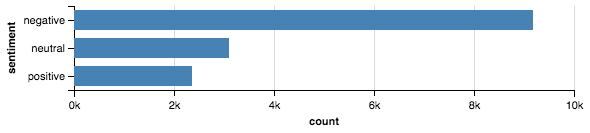

In [39]:
sentiment=data.groupby(['airline','airline_sentiment']).size()
sentiment=sentiment.reset_index()
totalSen=data.groupby(['airline_sentiment']).size()
totalSen=totalSen.reset_index()
totalSen['count']=totalSen[0]
Chart(totalSen).mark_bar().encode(
    y=Y('airline_sentiment',axis=Axis(title='sentiment')),
    x=X('count',axis=Axis(title='count'))
)

## Another way to build the chart above without using groupby for the data

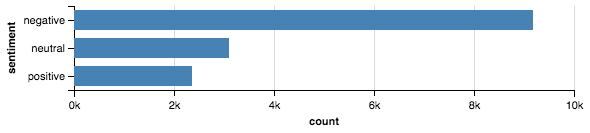

In [40]:
Chart(data).mark_bar().encode(
    y=Y('airline_sentiment',axis=Axis(title='sentiment')),
    x=X('count(airline_sentiment):Q',axis=Axis(title='count'))
)

In [41]:
sentiment['count']=sentiment[0]
sentiment.head()

airline airline_sentiment     0  count
0  American  negative          1960  1960 
1  American  neutral           463   463  
2  American  positive          336   336  
3  Delta     negative          955   955  
4  Delta     neutral           723   723

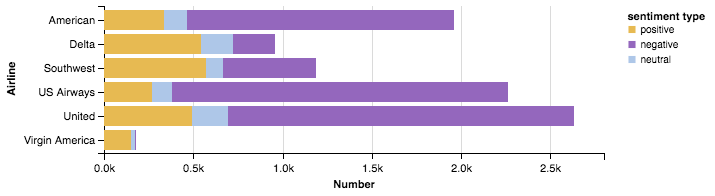

In [42]:
Chart(sentiment).mark_bar().encode(
    y=Y('airline',axis=Axis(title='Airline')),
    x=X('count',axis=Axis(title='Number')),
    color=Color('airline_sentiment',
        legend=Legend(
            title='sentiment type',
        ),
        scale=Scale(
            domain=['positive', 'negative', 'neutral'],
            range=['#e7ba52', '#9467bd', '#aec7e8'],
        ),
    )
)

## 1. Data cleaning: clean of punctuation

In [43]:
pd.set_option('display.max_colwidth', 1)
data['text']

0        @VirginAmerica What @dhepburn said.                                                                                                                   
1        @VirginAmerica plus you've added commercials to the experience... tacky.                                                                              
2        @VirginAmerica I didn't today... Must mean I need to take another trip!                                                                               
3        @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse                        
4        @VirginAmerica and it's a really big bad thing about it                                                                                               
5        @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA              
6        @VirginAmerica yes, nearly ever

In [44]:
import re,string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
# x=data['text'][11]
# ' '.join(re.sub("(@[A-Za-z0-9]+)|((&|;|:|-)[A-Za-z0-9]+)|([^0-9A-Za-z-' \t]+)|(\w+:\/\/\S+)|('[^\x00-\x7F]+)'"," ",x).split())

In [46]:
translator=str.maketrans({key: None for key in string.punctuation})
def transformText(tweet):
    tweet=tweet.lower()
    tweet=tweet.translate(translator)
    tweet=re.sub(r'\b\w\b','',tweet)
    return tweet
data['clean_text']=data.text.map(transformText)
data['clean_text'].head()

0    virginamerica what dhepburn said                                                                                       
1    virginamerica plus youve added commercials to the experience tacky                                                     
2    virginamerica  didnt today must mean  need to take another trip                                                        
3    virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4    virginamerica and its  really big bad thing about it                                                                   
Name: clean_text, dtype: object

## 2. Filter out neutral

In [47]:
newData=data[data.airline_sentiment.str.contains('neutral') == False]
newData.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
1  570301130888122368  positive          0.3486                         
3  570301031407624196  negative          1.0000                         
4  570300817074462722  negative          1.0000                         
5  570300767074181121  negative          1.0000                         
6  570300616901320704  positive          0.6745                         

  negativereason  negativereason_confidence         airline  \
1  NaN            0.0000                     Virgin America   
3  Bad Flight     0.7033                     Virgin America   
4  Can't Tell     1.0000                     Virgin America   
5  Can't Tell     0.6842                     Virgin America   
6  NaN            0.0000                     Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
1  NaN                    jnardino    NaN                 0               
3  NaN                    jnardino    NaN                 0               
4  NaN                    jnardino    NaN                 0               
5  NaN                    jnardino    NaN                 0               
6  NaN                    cjmcginnis  NaN                 0               

                                                                                                                                       text  \
1  @VirginAmerica plus you've added commercials to the experience... tacky.                                                                   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse             
4  @VirginAmerica and it's a really big bad thing about it                                                                                    
5  @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
6  @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)                                                            

  tweet_coord              tweet_created    tweet_location  \
1  NaN         2015-02-24 11:15:59 -0800  NaN                
3  NaN         2015-02-24 11:15:36 -0800  NaN                
4  NaN         2015-02-24 11:14:45 -0800  NaN                
5  NaN         2015-02-24 11:14:33 -0800  NaN                
6  NaN         2015-02-24 11:13:57 -0800  San Francisco CA   

                user_timezone  \
1  Pacific Time (US & Canada)   
3  Pacific Time (US & Canada)   
4  Pacific Time (US & Canada)   
5  Pacific Time (US & Canada)   
6  Pacific Time (US & Canada)   

                                                                                                                           clean_text  
1  virginamerica plus youve added commercials to the experience tacky                                                                  
3  virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse             
4  virginamerica and its  really big bad thing about it                                                                                
5  virginamerica seriously would pay 30  flight for seats that didnt have this playing\nits really the only bad thing about flying va  
6  virginamerica yes nearly every time  fly vx this “ear worm” won’ go away

## 3. Take the first 80% for training and the last 20% for testing

In [48]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(newData, test_size = 0.2)
#another way: train=df.sample(frac=.8) - downside: does not remember what rows it get so if use the same function to take test, there could be redundancy. 
#to avoid this, drop the rows has been chosen

## 4. Create 2 buckets: positive, negative

In [49]:
positiveDict={}
negativeDict={}
def takeWord(row):
    words=row['clean_text'].split()
    if row['airline_sentiment']=='positive':
        for word in words:
            if word not in positiveDict:
                positiveDict[word]=1
            else:
                positiveDict[word]+=1
    else:
        for word in words:
            if word not in negativeDict:
                negativeDict[word]=1
            else:
                negativeDict[word]+=1
    return negativeDict, positiveDict
train.apply(takeWord,axis=1)

6826     ({'nonweather': 1, 'planebroken': 1, 'notbabysitters': 1, 'volumecan': 1, '845am': 1, 'help': 499, 'glitches': 1, 'michael': 1, 'storms': 2, 'loading': 4, 'gems': 1, 'curfew': 1, 'wichita': 2, 'data': 3, 'itfits': 1, 'thru': 30, 'you': 2015, 'jumping': 2, '3511': 1, 'aa3390': 1, 'bums': 1, 'jackkairys': 3, 'notch': 1, 'custs': 1, 'webpage': 1, 'qualifies': 1, 'constant': 5, 'disconnected': 31, 'hover': 1, 'horrible': 64, 'accommodation': 1, 'bbbmedia': 1, 'ua5097': 1, 'parked': 5, 'herba': 1, 'sept': 3, 'abuse': 1, 'loner': 1, 'wind': 2, 'understand': 69, 'blankets': 2, 'hold': 490, 'think': 79, 'neverontime': 1, 'luxury': 1, '730': 4, 'followed': 7, 'knew': 21, 'escalate': 1, 'college': 2, '‘select': 1, 'cavalli': 1, 'experience': 123, 'flightledtried': 1, 'delayshandling': 1, '4465': 1, 'worrying': 1, 'combination': 1, 'mention': 14, 'lose': 36, 'locations': 3, 'acpt': 1, 'f6': 1, 'aware': 9, 'deplorable': 4, 'earnings': 1, 'efficiency': 5, 'park': 3, 'efficencies': 1, 'deva

## Another way to create the buckets

In [50]:
from collections import Counter

In [51]:
#create buckets positive
positiveDict2 = Counter("".join(newData[newData['airline_sentiment']=='positive']['clean_text'].values.tolist()).split(" "))
negativeDict2 = Counter("".join(newData[newData['airline_sentiment']=='negative']['clean_text'].values.tolist()).split(" "))

In [52]:
#Clean the data with stopwords
from nltk.corpus import stopwords
sw=set(stopwords.words('english'))
for i,row in train.iterrows():
    words=row.clean_text.split()
    for word in words:
        if word in sw:
            if row['airline_sentiment']=="negative" and word in negativeDict.keys():
                negativeDict.pop(word,None)
            elif row['airline_sentiment']=="positive" and word in positiveDict.keys():
                positiveDict.pop(word,None)

In [53]:
npf=pd.DataFrame(list(negativeDict.items()),columns=['word','count_N'])
ppf=pd.DataFrame(list(positiveDict.items()),columns=['word','count_P'])

In [54]:
wordDf=pd.merge(npf,ppf,how='outer',left_on='word',right_on='word').fillna(0)
wordDf.head()

word  count_N  count_P
0  nonweather      1.0      0.0    
1  planebroken     1.0      0.0    
2  notbabysitters  1.0      0.0    
3  volumecan       1.0      0.0    
4  845am           1.0      0.0

In [55]:
wordDf['count_N']=wordDf['count_N'].map(lambda x: x+1)
wordDf['count_P']=wordDf['count_P'].map(lambda x:x+1)

In [56]:
wordDf['%count_N']=wordDf['count_N'].map(lambda x:x/sum(wordDf['count_N']))
wordDf['%count_P']=wordDf['count_P'].map(lambda x:x/sum(wordDf['count_P']))
wordDf['log_N']=wordDf['%count_N'].map(lambda x:-np.log10(x)) #we change the sign to avoid multiple changing sign. we have to be careful when compare later on 
wordDf['log_P']=wordDf['%count_P'].map(lambda x:-np.log10(x))
wordDf.head()

word  count_N  count_P  %count_N  %count_P     log_N     log_P
0  nonweather      2.0      1.0      0.000021  0.000035  4.680662  4.458215
1  planebroken     2.0      1.0      0.000021  0.000035  4.680662  4.458215
2  notbabysitters  2.0      1.0      0.000021  0.000035  4.680662  4.458215
3  volumecan       2.0      1.0      0.000021  0.000035  4.680662  4.458215
4  845am           2.0      1.0      0.000021  0.000035  4.680662  4.458215

In [57]:
float(wordDf[wordDf.word=='title']['log_P'])

4.458214677865592

## 5. Prediction

In [58]:
def predict(row):
    pos_product=1
    neg_product=1
    for word in row['clean_text'].split(' '):
        if len(wordDf[wordDf.word==word])!=0:
            pos_product=pos_product*float(wordDf[wordDf.word==word]['log_P'])
            neg_product=neg_product*float(wordDf[wordDf.word==word]['log_N'])
    if pos_product<neg_product: #because we change the sign of log10
        return "positive"
    else:
        return "negative"

In [59]:
test['sentiment_predict']=test.apply(predict,axis=1)
test.head(15)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


tweet_id airline_sentiment  airline_sentiment_confidence  \
1743   569608322925473792  negative          1.0000                         
11129  568490964173627393  negative          0.6885                         
11840  567729749087498240  negative          1.0000                         
13532  569839216512917504  negative          1.0000                         
20     570265883513384960  negative          0.6705                         
10631  569103591966793728  negative          1.0000                         
8870   567783456420012032  positive          1.0000                         
1302   569842452716236800  negative          1.0000                         
5666   568827958527275008  positive          1.0000                         
9069   570252052099678208  negative          1.0000                         
699    570175238815657984  positive          0.7141                         
8937   567733834964156417  negative          1.0000                         
11333  568200350697717760  negative          1.0000                         
1524   569683567552262145  negative          1.0000                         
3167   568621033273602048  positive          1.0000                         

               negativereason  negativereason_confidence         airline  \
1743   Customer Service Issue  1.0000                     United           
11129  Bad Flight              0.3505                     US Airways       
11840  Lost Luggage            1.0000                     US Airways       
13532  Customer Service Issue  0.6707                     American         
20     Can't Tell              0.3614                     Virgin America   
10631  Cancelled Flight        0.3384                     US Airways       
8870   NaN                    NaN                         Delta            
1302   Can't Tell              0.6702                     United           
5666   NaN                    NaN                         Southwest        
9069   Customer Service Issue  1.0000                     US Airways       
699    NaN                     0.0000                     United           
8937   Customer Service Issue  1.0000                     Delta            
11333  Can't Tell              1.0000                     US Airways       
1524   Bad Flight              0.3492                     United           
3167   NaN                    NaN                         United           

      airline_sentiment_gold           name negativereason_gold  \
1743   NaN                    abbymrudd      NaN                  
11129  NaN                    EmmaTyrer      NaN                  
11840  NaN                    itsjustdoc     NaN                  
13532  NaN                    thelyandre     NaN                  
20     NaN                    MISSGJ         NaN                  
10631  NaN                    CLChicosky     NaN                  
8870   NaN                    FoppishDork    NaN                  
1302   NaN                    ShowExpert     NaN                  
5666   NaN                    alycam         NaN                  
9069   NaN                    yorkshire2002  NaN                  
699    NaN                    SaipanBrad     NaN                  
8937   NaN                    Darshan7Patel  NaN                  
11333  NaN                    od2be2003      NaN                  
1524   NaN                    FernHeinig18   NaN                  
3167   NaN                    CrayonBytes    NaN                  

       retweet_count  \
1743   1               
11129  0               
11840  0               
13532  0               
20     0               
10631  0               
8870   0               
1302   0               
5666   0               
9069   1               
699    0               
8937   0               
11333  0               
1524   0               
3167   0               

                                                                                                             

In [60]:
count=0
for i,row in test.iterrows():
    if row['airline_sentiment']==row['sentiment_predict']:
        count+=1
percent=count/len(test)
percent*100

90.55868341273279

## Therefore, there is 90.55% that the prediction is right!

## Extra: Plot the frequency of the word in the two dictionary

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [62]:
positiveText=" ".join(newData[newData['airline_sentiment']=='positive']['clean_text'].values.tolist())
negativeText=" ".join(newData[newData['airline_sentiment']=='negative']['clean_text'].values.tolist())

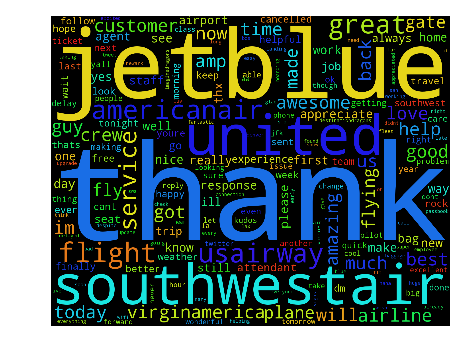

In [63]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(positiveText)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

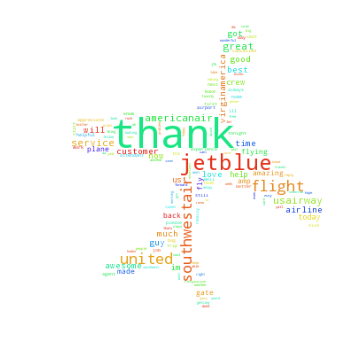

In [64]:
from scipy.misc import imread,imsave
airplane_mask=imread('/home/faculty/millbr02/pub/airplane.jpg')
imsave('./airplane.jpg',airplane_mask)
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=airplane_mask
            ).generate(positiveText)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_airplane.png', dpi=300)
plt.show()

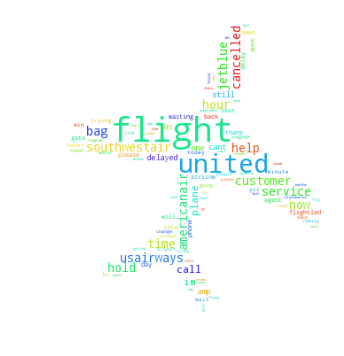

In [65]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=airplane_mask
            ).generate(negativeText)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_negairplane.png', dpi=300)
plt.show()

# Map plotting! Literally plot in map! :P

In [66]:
from mpl_toolkits.basemap import Basemap

/usr/local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3943: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  lats = lats[:,nx/2]


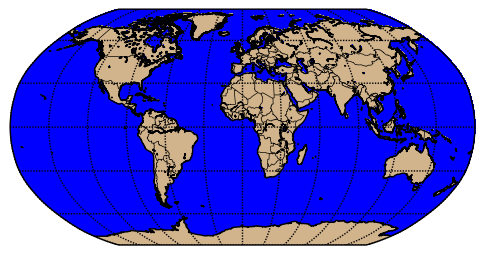

In [91]:
my_map=Basemap(projection='robin',lat_0=50,lon_0=0,resolution='l')
my_map.drawcountries()
my_map.drawcoastlines()
#my_map.fillcontinents(color='tan',lake_color='green')
my_map.drawlsmask(land_color='tan',ocean_color='blue')
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.drawparallels(np.arange(-90,90,30))
my_map.drawmeridians(np.arange(0,360,30))
plt.show()

In [79]:
my_map.fillcontinents?

## Zooming in:
Set values for licrnion, llcrniat,urcrnion and urcniat

/usr/local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


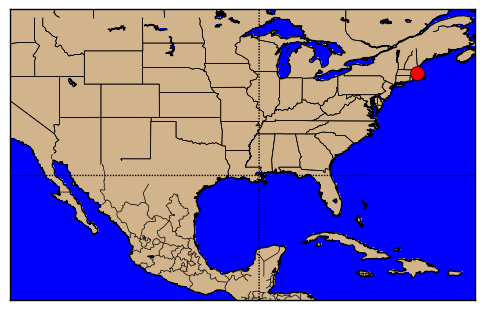

In [165]:
my_map = Basemap(projection='cyl',
    resolution = 'l',
    llcrnrlon=-120, llcrnrlat=15,urcrnrlon=-64,urcrnrlat=50)
my_map.drawcoastlines()
#my_map.fillcontinents(color='tan',lake_color='green')
my_map.drawlsmask(land_color='tan',ocean_color='blue')
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.drawparallels(np.arange(-90,90,30))
my_map.drawmeridians(np.arange(0,360,30))
my_map.drawstates()
lon = -71.02000488
lat = 42.361016
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=10,color='r')
plt.show()


In [183]:
locs=newData.dropna(subset=['tweet_coord'])
locs.head()


tweet_id airline_sentiment  airline_sentiment_confidence  \
21  570264145116819457  positive          1.0                            
28  570207886493782019  negative          1.0                            
32  570088404156698625  negative          1.0                            
34  570076792993611776  positive          1.0                            
69  569967019958730753  negative          1.0                            

            negativereason  negativereason_confidence         airline  \
21  NaN                    NaN                         Virgin America   
28  Bad Flight              1.0                        Virgin America   
32  Customer Service Issue  1.0                        Virgin America   
34  NaN                    NaN                         Virgin America   
69  Lost Luggage            1.0                        Virgin America   

   airline_sentiment_gold             name negativereason_gold  retweet_count  \
21  NaN                    DT_Les           NaN                 0               
28  NaN                    blackjackpro911  NaN                 0               
32  NaN                    Cuschoolie1      NaN                 0               
34  NaN                    NorthTxHomeTeam  NaN                 0               
69  NaN                    gianagon         NaN                 0               

                                                                                                                                   text  \
21  @VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA                                                                            
28  @VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS         
32  @VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&amp;F number at LAX!        
34  @VirginAmerica this is great news!  America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews   
69  @VirginAmerica everything was fine until you lost my bag                                                                              

                     tweet_coord              tweet_created  \
21  [40.74804263, -73.99295302]   2015-02-24 08:49:01 -0800   
28  [42.361016, -71.02000488]     2015-02-24 05:05:28 -0800   
32  [33.94209449, -118.40410103]  2015-02-23 21:10:41 -0800   
34  [33.2145038, -96.9321504]     2015-02-23 20:24:33 -0800   
69  [40.6413712, -73.78311558]    2015-02-23 13:08:21 -0800   

                   tweet_location               user_timezone  \
21  NaN                            NaN                          
28  San Mateo, CA & Las Vegas, NV  NaN                          
32  Washington DC                  Quito                        
34  Texas                          Central Time (US & Canada)   
69  New York + Panama              Eastern Time (US & Canada)   

                                                                                                                     clean_text  
21  virginamerica  love this graphic httptcout5grrwaaa                                                                           
28  virginamerica amazing to me that we cant get any cold air from the vents vx358 noair worstflightever roasted sfotobos        
32  virginamerica help left expensive headphones on flight 89 iad to lax today seat 2a no one answering lampf number at lax      
34  virginamerica this is great news  america could start flights to hawaii by end of year httptcor8p2zy3fe4 via pacificbiznews  
69  virginamerica everything was fine until you lost my bag

In [186]:
locs['lat']=locs.tweet_coord.map(lambda x: eval(x)[0])
locs['lon']=locs.tweet_coord.map(lambda x: eval(x)[1])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


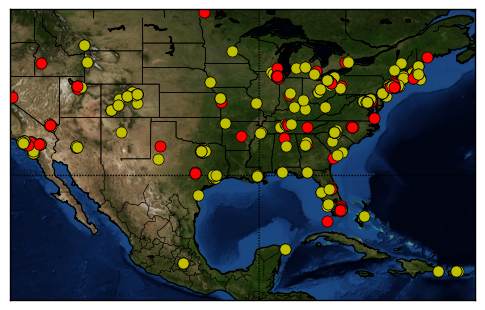

In [193]:
my_map = Basemap(projection='cyl',
    resolution = 'l',
    llcrnrlon=-120, llcrnrlat=15,urcrnrlon=-64,urcrnrlat=50)
my_map.drawcoastlines()
#my_map.fillcontinents(color='tan',lake_color='green')
#my_map.drawlsmask(land_color='tan',ocean_color='blue')
my_map.bluemarble()
#my_map.shadedrelief()
my_map.drawparallels(np.arange(-90,90,30))
my_map.drawmeridians(np.arange(0,360,30))
my_map.drawstates()
# lon = -71.02000488
# lat = 42.361016
# x,y = my_map(lon, lat)
#my_map.plot(x, y, 'bo', markersize=10,color='r')
for i,row in locs.iterrows():
    lon=row['lon']
    lat=row['lat']
    x,y=my_map(lon,lat)
    if row['airline_sentiment']=='positive':
        my_map.plot(x, y, 'bo', markersize=8,color='r')
    else:
        my_map.plot(x, y, 'bo', markersize=8,color='y')
plt.show()